In [1]:
# Import (load) the python packages that are required for this analysis. You may need to download them #
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xbpch
import iris
import iris.plot as iplt

#from gamap_colormap import WhGrYlRd
import sys
from matplotlib.colors import LogNorm
import matplotlib

#import rasterio as rio
import os
# import earthpy as et

# import xesmf as xe
from matplotlib.colors import BoundaryNorm
import numpy.ma as ma
from matplotlib.patches import Polygon
import cartopy
import cartopy.feature as cfeature

In [2]:
# warning suppression - deprecation warnings only

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Modify  the below to be the files in Jamie's Dropbox file.

- [ ] plot concentrations of emissions inventories as sanity check
    - [ ] EPA inventory definitely exists
- [ ] model runs: think about model run that you could ask Jamie to set up
    - [ ] A run that removes US wildfire emissions contributions 

In [3]:
# PAH_totals[4]

In [4]:
# import individual emissions inventories

# Load the data and print an example. (here, BAP)
# print data information to screen so user can see structure and numerical ranges

#PAH_Species = ['NAP', 'NAP', 'ACY', 'ACE', 'FLO', 'PHE', 'ANT', 'FLA', 'PYR', 'BAA', 'BBF', 'BKF', 'BAP', 'ICDP', 'DAHA', 'BHP', 'NPYR', 'DNPYR']
#PAH_Sources = ['Total', ]
#PAH_Concentrations = []

stem = '/net/fs11/d0/jamiekel/PKU_PAH_emissions/HTAP/'

# either these files don't exist (can't  see in folder) or I don't have access to them

PAH_files = [
    'ACY_2_25', 
    'ACE_2_25', 
    'BghiP_2_25', 
    'BbF_2_25', 
    'BaP_2_25', 
    'BaA_2_25', 
    'ANT_2_25',
    'FLO_2_25',
    'FLA_2_25',
    'DahA_2_25',
    'CHR_2_25',
    'BkF_2_25',
    'PYR_2_25',
    'PHE_2_25',
    'NAP_2_25',
    'IcdP_2_25'
]

PAH_totals =[]
counter = 0

for y in range(0, len(PAH_files)):
    PAH_Concentrations = []
    conc = iris.load(stem + PAH_files[y] + '.nc')[0]
    print(conc)
    PAH_Concentrations.append(conc[0])
    counter += 1
    # print(PAH_Concentrations)
    PAH_totals.append(PAH_Concentrations)
    
print(counter, "how  many files I loaded")

emission / (kg/m^2/s)               (time: 12; latitude: 91; longitude: 144)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Attributes:
          CDI: Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          history: Mon Nov 02 14:08:45 2020: cdo remapbil,targetgrid3 ACY_2014.nc ACY_2_2...
emission / (kg/m^2/s)               (time: 12; latitude: 91; longitude: 144)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Attributes:
          CDI: Climate Data Interface versi

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'emission' invalid units 'g ,IcdP/km2/month'
  warnings.warn(msg)
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2341: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name),


In [5]:
BAP = PAH_totals[5][0]

In [6]:
BAP

<iris 'Cube' of emission / (kg/m^2/s) (latitude: 91; longitude: 144)>

In [7]:
print (BAP)
print ('')
print ('printing what this "looks" like to the user...')
print (BAP)
print ('')
print ('printing range (minimum/maximum) values to show user....')
print ('min concentration BAP = ', np.min(BAP.data))
print ('max concentration BAP = ',  np.max(BAP.data))

emission / (kg/m^2/s)               (latitude: 91; longitude: 144)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          time: 2565-06-02 00:00:00
     Attributes:
          CDI: Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.5
          history: Mon Nov 02 14:09:32 2020: cdo remapbil,targetgrid3 BaA_2014.nc BaA_2_2...

printing what this "looks" like to the user...
emission / (kg/m^2/s)               (latitude: 91; longitude: 144)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          time: 2565-06-02 00:00:00
     Attributes:
          CDI: Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi

In [8]:
# # pass the list of all regional concentrations from above
# # pass the string for the region you want

# def _plotter(totals):
#     for i in range(0, len(totals)):
#         PAH = totals[i][0]

#         # Manually define countour levels 
#         #contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

#         # define contours by minima and maxima
        
#         contour_levels = np.linspace(np.min(PAH.data), np.max(PAH.data))
        
#         #contour_levels = np.linspace(2.9*(10**-12), 3.0*(10**-10))
        
#         # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
#         cmap = plt.cm.get_cmap('YlOrRd')

#         # combine the countour levels and colour scale 
#         norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

#         # create blank figure with manually-defined size (inches)
#         plt.figure(figsize=(10, 7))                                                      

#         # define how many sub-plots will be in this, and the geospatial projection
#         ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

#         # plot a title 
#         plt.title('Simulated (GEOS-Chem) annual-average BAP concentration', fontsize=12)

#         # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
#         mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

#         # plot a colour bar 
#         bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
#         bar.set_ticks(contour_levels[1:-1])
#         bar.set_ticklabels(contour_levels[1:-1])
#         bar.ax.tick_params(labelsize=12, rotation=60)
#         bar.set_label('ng m$^{-3}$', fontsize=12)
#         plt.gca().autoscale(False)

#         # overlay coastlines on the map 
#         plt.gca().coastlines()

#         # make figure look prettier by trying to expand the images to cover white space
#         plt.tight_layout()
        
#         source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
#         for zone in range(0, len(source_zones)):
#             if totals[i] == source_zones[zone]:
#                 title = 'Spatial_Conc_' + totals[i] + '.png'

#                 # save the figure 
#                 plt.savefig(title, dpi=300)

In [9]:
#_plotter(PAH_totals)

In [10]:
# alter the totals to be per year, as an annual average
# what I have right now is BAP per second

10**12

1000000000000

In [11]:
# pass the list of all regional concentrations from above
# pass the string for the region you want

def _plotter_single(totals, value):
    #for i in range(0, len(totals)):
    PAH_raw = totals[value][0]
    
    # currently in kg / (m^2 * s)
    # a sensible unit already, spatial component is per m^2, not per grid box
    # space component has to be in meters, not grid cell
    # could convert kg to ng ot g
    # could convert s to per year or other time units
    PAH = PAH_raw.data * 86400 * 365 * (10**12) * (10**9) # PAH * seconds in day * days in year * convert to ng (not leap year)
    
    cont = [
        #3.5*(10**-17),
        #4.5*(10**-17),
        5.5*(10**-17),
        6.5*(10**-17),
        7.5*(10**-17),
        8.5*(10**-17),
        9.5*(10**-17),
        1.5*(10**-16), 
        2.5*(10**-16), 
        3.5*(10**-16), 
        4.5*(10**-16),  
        5.5*(10**-16),
        6.5*(10**-16),
        7.5*(10**-16),
        8.5*(10**-16),
        9.5*(10**-16),
        1.5*(10**-15),
        2.5*(10**-15),
        3.5*(10**-15),
        4.5*(10**-15),
        5.5*(10**-15),
        6.5*(10**-15),
        7.5*(10**-15),
        8.5*(10**-15),
        9.5*(10**-15)
    ]
    
    contour_levels = np.round(cont, 18)

    # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
    cmap = plt.cm.get_cmap('YlOrRd')

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=(10, 7))                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    # plot a title 
    plt.title('Simulated (GEOS-Chem) annual-average concentration of ' + PAH_files[value][:4], fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(PAH_raw, cmap=cmap, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_levels[1:-1])
    bar.set_ticklabels(contour_levels[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    plt.gca().coastlines()

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


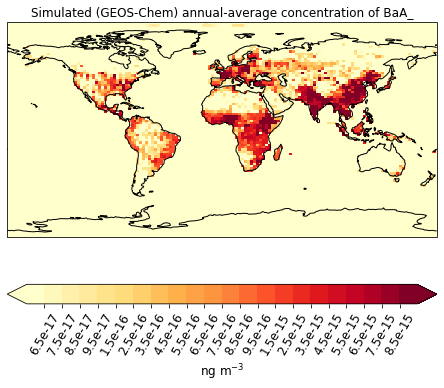

In [12]:
_plotter_single(PAH_totals, 5)

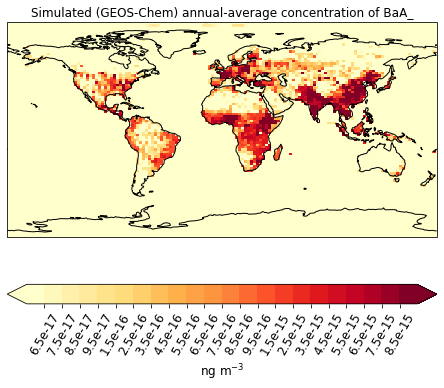

In [13]:
_plotter_single(PAH_totals, 5)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'lo

ValueError: Cube must be 2-dimensional. Got 1 dimensions.

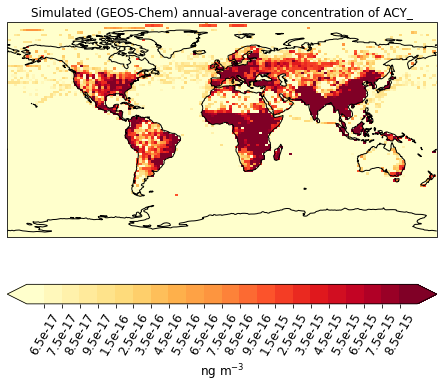

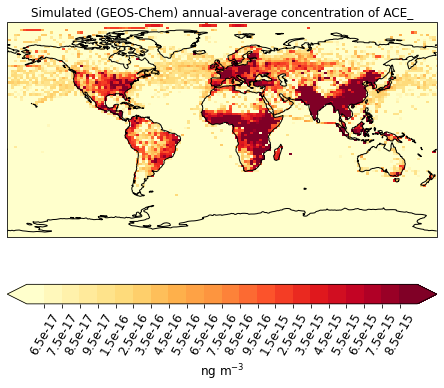

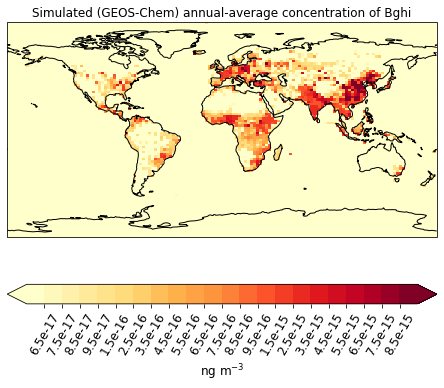

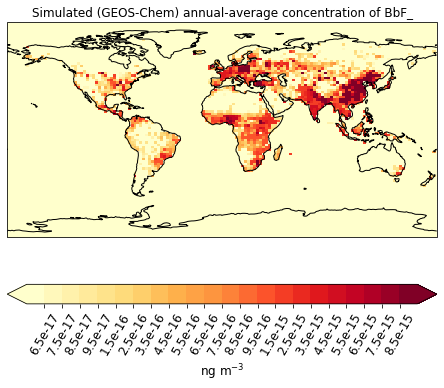

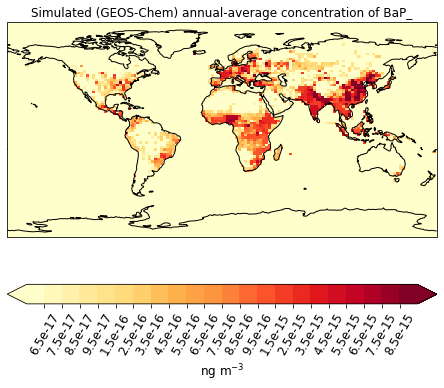

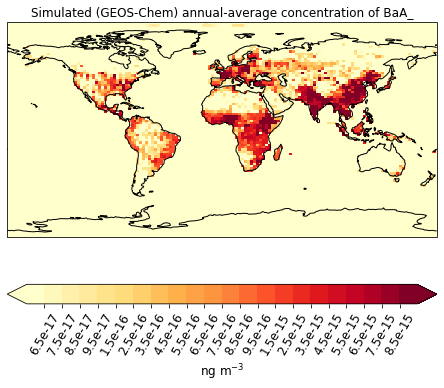

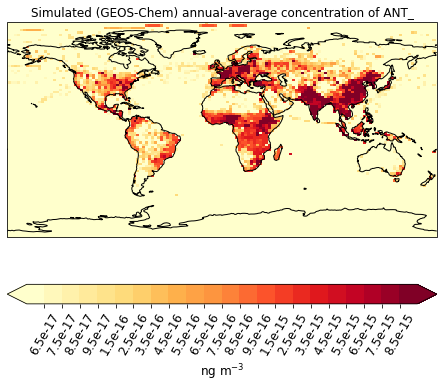

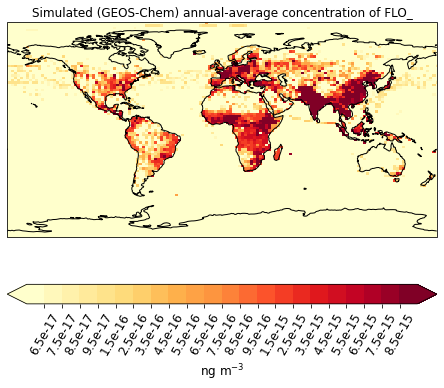

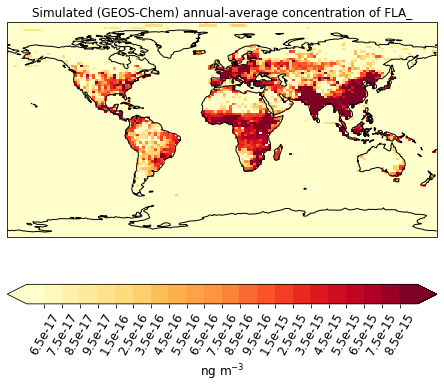

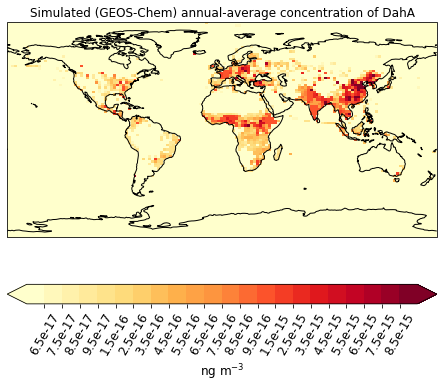

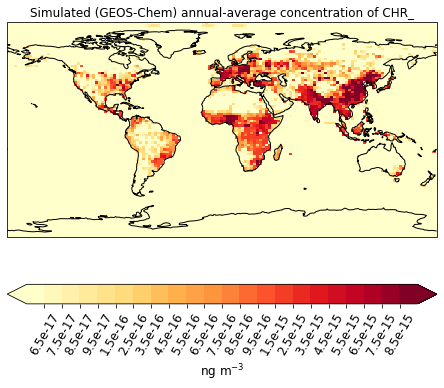

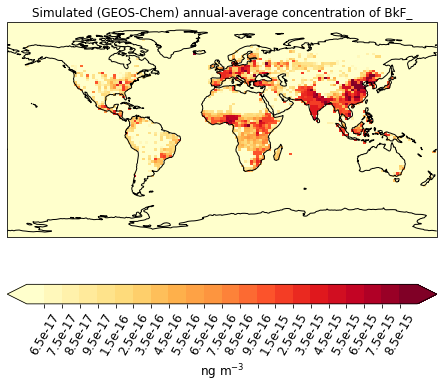

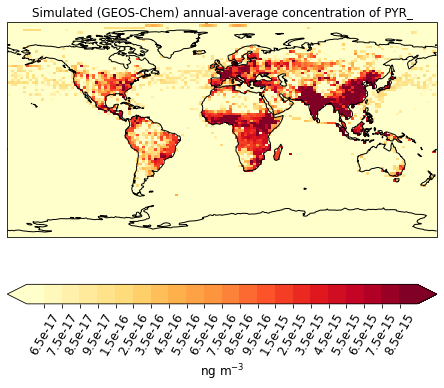

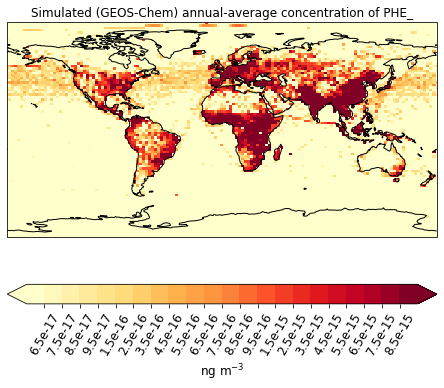

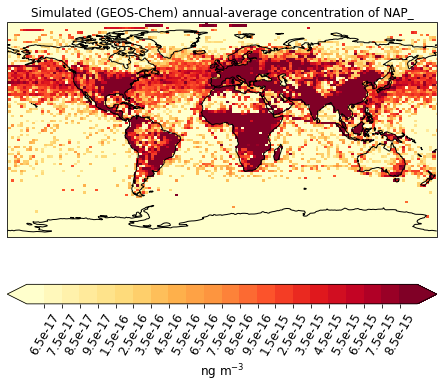

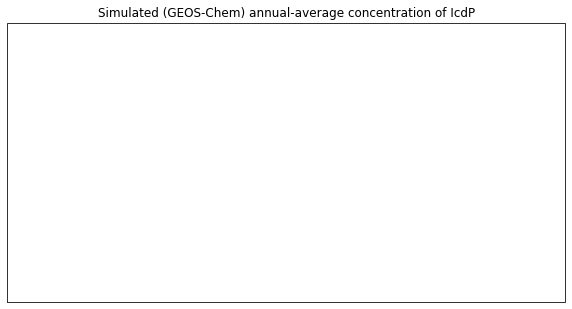

In [14]:
sum_PAH = []

for i in range(0, len(PAH_files)):
    _plotter_single(PAH_totals, i)

In [15]:
# summation with Iris Cube

BAP2 = PAH_totals[5][0]
BAP2.coord('latitude').guess_bounds()
BAP2.coord('longitude').guess_bounds()
BAP_sum = BAP2.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


In [16]:
# # can convert with dimensional analysis

# # current units are in kg / m^2 * s
# # convert to Gg per year
# # PAH * seconds in a day * days in a year * Gg
# BAP_total = BAP_sum.data * 86400 * 365 * (10**-6) 

# # final units are in Gg / m^2
# # this isn't what I want
# BAP_total

In [17]:
SA_path = 'mod_analysis/rundir_201215_A/Surface_Area_GridCells.nc'
SA = iris.load('/net/fs11/d0/jamiekel/' + SA_path)[0]

In [18]:
# multiply by surface area cube,get kg / s

SA.coord('latitude').guess_bounds()
SA.coord('longitude').guess_bounds()
BAP_kg_s = BAP2 * SA
type(BAP_kg_s)

iris.cube.Cube

In [19]:
# PAH * seconds in a day * days in a year * Gg
BAP_collapsed = BAP_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
BAP_Gg_yr = BAP_collapsed.data * 86400 * 365 * (10**-6)

/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


In [20]:
# BAP in Gg over a year over the whole world
BAP_Gg_yr

15.982068732261657

In [21]:
PAH_Gg_list = []

In [22]:
PAH_Gg_list.append(BAP_Gg_yr)

In [23]:
PAH_Gg_list

[15.982068732261657]

In [31]:
NAP_start = PAH_totals[1][0]

# guess coordinate
#NAP_start.coord('latitude').guess_bounds()
#NAP_start.coord('longitude').guess_bounds()

# multiple by surface area cube in m^2
NAP_kg_s = NAP_start * SA.data

# collapse resulting cube
NAP_collapsed = NAP_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
NAP_Gg_yr = NAP_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(NAP_Gg_yr)

print(NAP_Gg_yr)

43.55173611831665


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [32]:
type(SA.data)

numpy.ma.core.MaskedArray

In [30]:
SA

<iris 'Cube' of DXYP_DXYP / (1) (latitude: 91; longitude: 144)>

In [33]:
NAP_start = PAH_totals[1][0]

# multiple by surface area cube in m^2
NAP_kg_s = NAP_start * SA.data

# collapse resulting cube
NAP_collapsed = NAP_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
NAP_Gg_yr = NAP_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(NAP_Gg_yr)

print(NAP_Gg_yr)

43.55173611831665


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [34]:
ACY_start = PAH_totals[2][0]

# multiple by surface area cube in m^2
ACY_kg_s = ACY_start * SA.data

# collapse resulting cube
ACY_collapsed = ACY_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
ACY_Gg_yr = ACY_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(ACY_Gg_yr)

print(ACY_Gg_yr)

5.591548688650131


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [35]:
ACE_start = PAH_totals[3][0]

# multiple by surface area cube in m^2
ACE_kg_s = ACE_start * SA.data

# collapse resulting cube
ACE_collapsed = ACE_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
ACE_Gg_yr = ACE_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(ACE_Gg_yr)

print(ACE_Gg_yr)

18.724541353225707


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [36]:
FLO_start = PAH_totals[4][0]

# multiple by surface area cube in m^2
FLO_kg_s = FLO_start * SA.data

# collapse resulting cube
FLO_collapsed = FLO_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
FLO_Gg_yr = FLO_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(FLO_Gg_yr)

print(FLO_Gg_yr)

5.179385787248611


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [37]:
PHE_start = PAH_totals[5][0]

# multiple by surface area cube in m^2
PHE_kg_s = PHE_start * SA.data

# collapse resulting cube
PHE_collapsed = PHE_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
PHE_Gg_yr = PHE_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(PHE_Gg_yr)

print(PHE_Gg_yr)

15.982068732261657


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


In [ ]:
ANT_start

In [38]:
ANT_start = PAH_totals[6][0]

# multiple by surface area cube in m^2
ANT_kg_s = ANT_start * SA.data

# SA.coord('longitude').guess_bounds()
# SA.coord('longitude').guess_bounds()
# ANT_start.coord('latitude').guess_bounds()
# ANT_start.coord('latitude').guess_bounds()

# collapse resulting cube
ANT_collapsed = ANT_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
ANT_Gg_yr = ANT_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(ANT_Gg_yr)

print(ANT_Gg_yr)

21.66416923713684


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [ ]:
FLA_start.shape

In [ ]:
SA.shape

In [39]:
FLA_start = PAH_totals[7][0]

# multiple by surface area cube in m^2
FLA_kg_s = FLA_start * SA.data

# collapse resulting cube
FLA_collapsed = FLA_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
FLA_Gg_yr = FLA_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(FLA_Gg_yr)

print(FLA_Gg_yr)

23.296638573646543


/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/cube.py:3218: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/home/disha/.conda/envs/disha_env/lib/python3.9/site-packages/iris/coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [ ]:
PYR_start = PAH_totals[8][0]

PYR_start.coord('latitude').guess_bounds()
PYR_start.coord('latitude').guess_bounds()

# multiple by surface area cube in m^2
PYR_kg_s = PYR_start * SA

# collapse resulting cube
PYR_collapsed = PYR_kg_s.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

# convert to Gg per year
PYR_Gg_yr = PYR_collapsed.data * 86400 * 365 * (10**-6)

# add to list of Gg
PAH_Gg_list.append(PYR_Gg_yr)

print(PYR_Gg_yr)

In [ ]:
# try to calculate the total global emissions over a year

# pop_I.coord('latitude').guess_bounds()
# pop_I.coord('longitude').guess_bounds()
# pop_II = pop_I.collapsed(['longitude', 'latitude'], iris.analysis.SUM)

In [ ]:
    # global PAH totals can be compared to other students
    #PAH = PAH_raw.data
    
#     print(type(PAH_raw))
#     print(type(PAH))
#     print(np.min(PAH.data))
#     print(np.max(PAH.data))

    # Manually define countour levels 
    # cont         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    # define contours by minima and maxima

    # contour_levels = np.linspace(np.min(PAH.data), np.max(PAH.data))
    # cont = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    #contour_levels = np.linspace(np.round(1.5*(10**-16)), 1.37*(10**-14), 10)